In [15]:
import pandas as pd

# Load the power data into a pandas DataFrame
power_data = pd.read_csv('data/energy_data_2023-04-27_16-13-21.csv')

# Set the time step duration (in seconds)
time_step_duration = 3

# Set a threshold for the compressor's power consumption
compressor_threshold = 2.0

# Find the on and off times of the compressor
compressor_on = None
compressor_off = None
compressor_running = False
compressor_running_time = 0
last_off_time = None

# Lists to store the on/off times and durations
on_times = []
off_times = []
running_durations = []
off_durations = []

for i, row in power_data.iterrows():
    time_step = i + 1  # Time step starts from 1
    power = row['power']

    if power > compressor_threshold:
        if not compressor_running:
            compressor_on = time_step
            compressor_running = True
            if last_off_time is not None and compressor_on is not None:
                off_duration = compressor_on - last_off_time
                off_duration_str = str(int(off_duration / time_step_duration)) + ":" + \
                       str((off_duration % time_step_duration) * time_step_duration).zfill(2)
                off_durations.append(off_duration_str)
        compressor_running_time += time_step_duration
    else:
        if compressor_running:
            compressor_off = time_step
            compressor_running = False
            
            # Convert the durations to hours:minutes:seconds format
            running_duration_str = str(int(compressor_running_time / 3600)).zfill(2) + ":" + \
                       str(int(compressor_running_time % 3600 / 60)).zfill(2) + ":" + \
                       str(compressor_running_time % 60).zfill(2)

            # Append the on/off times and durations to the lists
            on_times.append(compressor_on)
            off_times.append(compressor_off)
            running_durations.append(running_duration_str)
            
            # Store the current off time as the last off time for the next cycle
            last_off_time = compressor_off
            
            # Reset the running time counter
            compressor_running_time = 0

# Create a list of tuples containing the on/off times, durations, and off durations
data = list(zip(on_times, off_times, running_durations, off_durations))

# Create a DataFrame from the list of tuples
event_df = pd.DataFrame(data, columns=['On Time', 'Off Time', 'Running Duration', 'Off Duration'])

# Write the DataFrame to a CSV file
event_df.to_csv('event_data_207.csv', index=False)


In [16]:
data = pd.read_csv('event_data_207.csv')

In [17]:
data

,On Time,Off Time,Running Duration,Off Duration
0,2,323,00:16:03,156:03


In [19]:
print(power_data)

     time     voltage  current  frequency      power
0       0    0.163125    0.313    123.564   0.051058
1       1   78.163125    0.212     60.000  16.570583
2       2  108.116250    0.368     60.000  39.786780
3       3  107.557500    0.355     60.000  38.182913
4       4   85.659375    0.247     60.000  21.157866
..    ...         ...      ...        ...        ...
911   911   52.503750    0.128     60.000   6.720480
912   912   52.102500    0.134     60.000   6.981735
913   913   52.505625    0.140     60.000   7.350788
914   914   52.908750    0.138     60.000   7.301408
915   915   52.503750    0.128     60.000   6.720480

[916 rows x 5 columns]


In [22]:
import os
import pandas as pd

# Define the folder where the CSV files are located
folder_path = 'data'

# Initialize an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Loop through all CSV files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # Load the CSV file into a pandas DataFrame
        file_path = os.path.join(folder_path, filename)
        data = pd.read_csv(file_path)
        
        # Add the current data to the combined data DataFrame
        combined_data = pd.concat([combined_data, data], ignore_index=True)

# Sort the combined data by time
combined_data.sort_values(by='time', inplace=True)

# Reset the index of the combined data to ensure it is sequential
combined_data.reset_index(drop=True, inplace=True)

# Write the combined data to a new CSV file
combined_data.to_csv('combined_data.csv', index=False)


In [31]:
import os
import pandas as pd

folder_path = 'data'  # replace with the path to your folder

# read all CSV files in the folder into a list of DataFrames
dfs = []
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path, index_col=0)
        dfs.append(df)

# combine all DataFrames into a single DataFrame
combined_df = pd.concat(dfs)

# make the 'time' column consistent
combined_df.reset_index(drop=True, inplace=True)
combined_df.index.name = 'time'

# save the combined DataFrame as a CSV file
combined_df.to_csv('combined_data.csv')


In [32]:
combined_df

,voltage,current,frequency,power
time,,,,
0,51.699375,0.003,60.0,0.155098
1,108.911250,0.007,60.0,0.762379
2,108.793125,0.008,60.0,0.870345
3,106.368750,0.007,60.0,0.744581
4,108.793125,0.007,60.0,0.761552
...,...,...,...,...
2033,85.393125,0.005,60.0,0.426966
2034,49.666875,0.003,60.0,0.149001
2035,107.979375,0.007,60.0,0.755856


In [33]:
import pandas as pd

# Load the power data into a pandas DataFrame
power_data = pd.read_csv('combined_data.csv')

# Set the time step duration (in seconds)
time_step_duration = 3

# Set a threshold for the compressor's power consumption
compressor_threshold = 2.0

# Find the on and off times of the compressor
compressor_on = None
compressor_off = None
compressor_running = False
compressor_running_time = 0
last_off_time = None

# Lists to store the on/off times and durations
on_times = []
off_times = []
running_durations = []
off_durations = []

for i, row in power_data.iterrows():
    time_step = i + 1  # Time step starts from 1
    power = row['power']

    if power > compressor_threshold:
        if not compressor_running:
            compressor_on = time_step
            compressor_running = True
            if last_off_time is not None and compressor_on is not None:
                off_duration = compressor_on - last_off_time
                off_duration_str = str(int(off_duration / time_step_duration)) + ":" + \
                       str((off_duration % time_step_duration) * time_step_duration).zfill(2)
                off_durations.append(off_duration_str)
        compressor_running_time += time_step_duration
    else:
        if compressor_running:
            compressor_off = time_step
            compressor_running = False
            
            # Convert the durations to hours:minutes:seconds format
            running_duration_str = str(int(compressor_running_time / 3600)).zfill(2) + ":" + \
                       str(int(compressor_running_time % 3600 / 60)).zfill(2) + ":" + \
                       str(compressor_running_time % 60).zfill(2)

            # Append the on/off times and durations to the lists
            on_times.append(compressor_on)
            off_times.append(compressor_off)
            running_durations.append(running_duration_str)
            
            # Store the current off time as the last off time for the next cycle
            last_off_time = compressor_off
            
            # Reset the running time counter
            compressor_running_time = 0

# Create a list of tuples containing the on/off times, durations, and off durations
data = list(zip(on_times, off_times, running_durations, off_durations))

# Create a DataFrame from the list of tuples
event_df = pd.DataFrame(data, columns=['On Time', 'Off Time', 'Running Duration', 'Off Duration'])

# Write the DataFrame to a CSV file
event_df.to_csv('combined_data_event.csv', index=False)


In [34]:
event_df

,On Time,Off Time,Running Duration,Off Duration
0,10,594,00:29:12,172:00
1,1110,1112,00:00:06,49:06
2,1261,1263,00:00:06,75:03


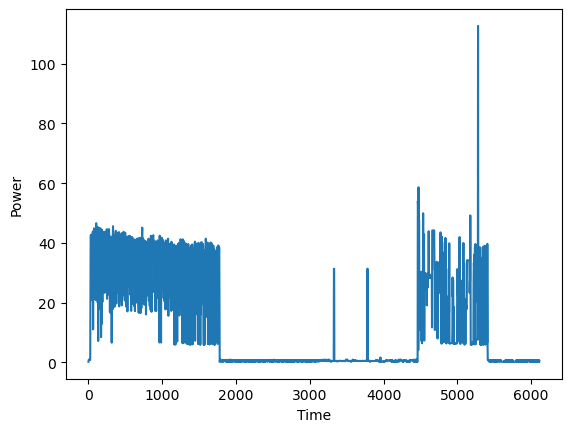

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the CSV file and create a DataFrame
df = pd.read_csv('combined_data.csv')

# Create a plot of power vs. time
plt.plot(df['time']*3,df['power'])
plt.xlabel('Time')
plt.ylabel('Power')
plt.show()

In [39]:
import pandas as pd

# Load the power data into a pandas DataFrame
power_data = pd.read_csv('combined_data.csv')

# Set the time step duration (in seconds)
time_step_duration = 3

# Set a threshold for the compressor's power consumption
compressor_threshold = 2.0

# Find the on and off times of the compressor
compressor_on = None
compressor_off = None
compressor_running = False
compressor_running_time = 0
last_off_time = None

# Lists to store the on/off times and durations
on_times = []
off_times = []
running_durations = []
off_durations = []

for i, row in power_data.iterrows():
    time_step = i + 1  # Time step starts from 1
    power = row['power']

    if power > compressor_threshold:
        if not compressor_running:
            compressor_on = time_step
            compressor_running = True
            if last_off_time is not None and compressor_on is not None:
                off_duration = compressor_on - last_off_time
                off_duration_str = str(int(off_duration / time_step_duration)) + ":" + \
                       str((off_duration % time_step_duration) * time_step_duration).zfill(2)
                off_durations.append(off_duration_str)
        compressor_running_time += time_step_duration
    else:
        if compressor_running:
            compressor_off = time_step
            compressor_running = False
            
            # Convert the durations to hours:minutes:seconds format
            running_duration_str = str(int(compressor_running_time / 3600)).zfill(2) + ":" + \
                       str(int(compressor_running_time % 3600 / 60)).zfill(2) + ":" + \
                       str(compressor_running_time % 60).zfill(2)

            # Append the on/off times and durations to the lists
            on_times.append(compressor_on)
            off_times.append(compressor_off)
            running_durations.append(running_duration_str)
            
            # Store the current off time as the last off time for the next cycle
            last_off_time = compressor_off
            
            # Reset the running time counter
            compressor_running_time = 0

# Calculate the last off duration based on the difference between the last on time and the previous off time
if last_off_time is not None and on_times[-1] is not None:
    last_off_duration = on_times[-1] - last_off_time
    last_off_duration_str = str(int(last_off_duration / time_step_duration)) + ":" + \
                       str((last_off_duration % time_step_duration) * time_step_duration).zfill(2)
    off_durations.append(last_off_duration_str)

# Create a list of tuples containing the on/off times, durations, and off durations
data = list(zip(on_times, off_times, running_durations, off_durations))

# Create a DataFrame from the list of tuples
event_df = pd.DataFrame(data, columns=['On Time', 'Off Time', 'Running Duration', 'Off Duration'])

# Write the DataFrame to a CSV file
event_df.to_csv('combined_data_event.csv', index=False)


In [40]:
event_df

,On Time,Off Time,Running Duration,Off Duration
0,10,594,00:29:12,172:00
1,1110,1112,00:00:06,49:06
2,1261,1263,00:00:06,75:03
3,1489,1805,00:15:48,-105:06
